<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/YB_11_15_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [ ]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [ ]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [ ]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [ ]:
#릿지모델 생성 및 훈련
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train, y_train)

#예측값 구하기
y_pred_ridge = ridge_model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_age_ridge = y_pred_ridge + 1.5

#MSE와 RMSE구하기
mse_ridge = mean_squared_error(y_test + 1.5, y_age_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(mse_ridge)
print(rmse_ridge)

4.772148639987029
2.184524808736909


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [ ]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [ ]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# RMSE를 계산하기 위한 사용자 정의 스코어 함수
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scikit-learn에서 사용할 스코어 변환
scorer = make_scorer(rmse_scorer, greater_is_better=False)

# alpha에 따른 평균 RMSE를 저장할 리스트
alpha_rmse = []

# alpha 값을 반복하면서 5-폴드 교차 검증
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    # cross_val_score는 음수 값을 반환하므로 음수 부호를 제거하여 양수 RMSE로 변환
    rmse_scores = -cross_val_score(ridge_model, X_train, y_train, scoring=scorer, cv=5)
    mean_rmse = np.mean(rmse_scores)
    alpha_rmse.append(mean_rmse)
    print(f"Alpha: {alpha}, Mean RMSE: {mean_rmse:.4f}")

# 가장 낮은 RMSE를 가지는 alpha 찾기
best_alpha_index = np.argmin(alpha_rmse)
best_alpha = alphas[best_alpha_index]

print(f"\nBest alpha: {best_alpha}, RMSE: {alpha_rmse[best_alpha_index]:.4f}")

Alpha: 0, Mean RMSE: 2.2420
Alpha: 0.1, Mean RMSE: 2.2282
Alpha: 1, Mean RMSE: 2.2152
Alpha: 10, Mean RMSE: 2.3650
Alpha: 100, Mean RMSE: 2.6364

Best alpha: 1, RMSE: 2.2152


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [ ]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [ ]:
#모델 생성 및 훈련
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

#예측값 구하기
y_pred_xgb = xgb_model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_age_xgb = y_pred_xgb + 1.5

#MSE와 RMSE 구하기
mse_xgb = mean_squared_error(y_test + 1.5, y_age_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"MSE (XGBRegressor): {mse_xgb}")
print(f"RMSE (XGBRegressor): {rmse_xgb}")

MSE (XGBRegressor): 4.924411985796883
RMSE (XGBRegressor): 2.21910161682535


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

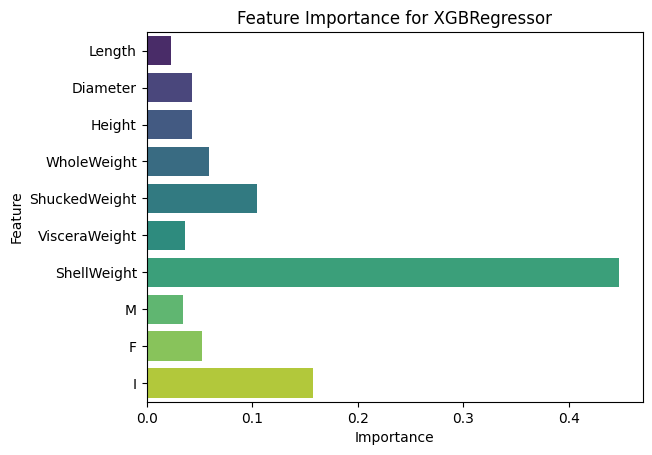

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_

feature_names = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'M', 'F', 'I']

sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title('Feature Importance for XGBRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [ ]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (124, 13)
y_train shape: (124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [ ]:
#기울기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

model.coef_

array([-1.02367834e-01,  3.06939765e-02, -1.71501314e-01,  4.41161158e-02,
        1.42355903e-04,  1.47879429e-01, -3.72945032e-01, -2.68839810e-01,
        5.16997875e-02,  8.07276943e-02, -1.41326172e-01, -2.62250783e-01,
       -7.15317729e-04])

In [ ]:
#절편
model.intercept_

3.1074895435093146

3-3) 모델의 정확도를 구하세요.

In [36]:
#모델의 예측값 구하기
y_pred = model.predict(X_test)

#모델의 정확도 구하기
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9007762333580169
